In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [138]:
df = pd.read_csv('marketing_campaign.csv',sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# EDA

In [139]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [140]:
df.describe

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012  

In [141]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [142]:
# Handle missing values in Income
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [143]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [144]:
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Z_CostContact','Z_Revenue'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

In [145]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\yerem\AppData\Local\Temp\ipykernel_23148\177162232.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\yerem\AppData\Local\Temp\ipykernel_23148\177162232.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\yerem\AppData\Local\Temp\ipykernel_23148\177162232.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\yerem\AppData\Local\Temp\ipykernel_23148\177162232.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime

In [146]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [147]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [148]:
# rename categories
df['Marital_Status'].replace({"Alone":"Single",
                            "Married":"Relationship",
                            "Absurd":"Single",
                            "YOLO":"Single",
                            "Together":"Relationship",
                            "Divorced":"Single", 
                            "Widow":"Single",
}, inplace=True)

df.Marital_Status.value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [149]:
df['Education'].replace({"Graduation" : "Graduate",
                        "PhD" : "Postgraduate",
                        "Master" : "Postgraduate",
                        "2n Cycle" : "Postgraduate",
                        "Basic" : "Undergraduate",
}, inplace=True)

In [150]:
df['Children'] = df.Kidhome + df.Teenhome
df.drop(['Kidhome', 'Teenhome'], axis = 1, inplace = True)

In [151]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,1994,387,2125,8180,2569,2114,9736,4939,6565,2278
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,1983,1976,1959,1952,1987,1946,1980,1946,1949,1985
Education,Graduate,Graduate,Graduate,Graduate,Postgraduate,Postgraduate,Graduate,Postgraduate,Postgraduate,Postgraduate,Graduate,Undergraduate,Graduate,Postgraduate,Graduate,Postgraduate,Graduate,Graduate,Postgraduate,Postgraduate
Marital_Status,Single,Single,Relationship,Relationship,Relationship,Relationship,Single,Relationship,Relationship,Relationship,Relationship,Relationship,Single,Single,Relationship,Single,Relationship,Relationship,Relationship,Single
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,52247.251354,7500.0,63033.0,59354.0,17323.0,82800.0,41850.0,37760.0,76995.0,33812.0
Dt_Customer,2012-04-09 00:00:00,2014-08-03 00:00:00,2013-08-21 00:00:00,2014-10-02 00:00:00,2014-01-19 00:00:00,2013-09-09 00:00:00,2012-11-13 00:00:00,2013-08-05 00:00:00,2013-06-06 00:00:00,2014-03-13 00:00:00,2013-11-15 00:00:00,2012-11-13 00:00:00,2013-11-15 00:00:00,2013-11-15 00:00:00,2012-10-10 00:00:00,2012-11-24 00:00:00,2012-12-24 00:00:00,2012-08-31 00:00:00,2013-03-28 00:00:00,2012-03-11 00:00:00
Recency,58,38,26,26,94,16,34,32,19,68,11,59,82,53,38,23,51,20,91,86
MntWines,635,11,426,11,173,520,235,76,14,28,5,6,194,233,3,1006,53,84,1012,4
MntFruits,88,1,49,4,43,42,65,10,0,0,5,16,61,2,14,22,5,5,80,17
MntMeatProducts,546,6,127,20,118,98,164,56,24,6,6,11,480,53,17,115,19,38,498,19


<AxesSubplot:>

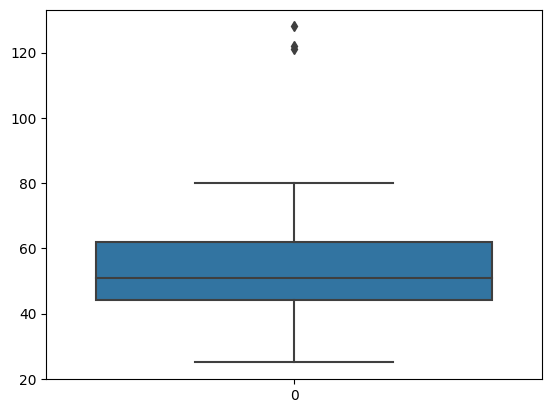

In [152]:
df['age'] = 2021 - df['Year_Birth'] 
df = df.drop(df['Year_Birth'])
# Show Oulier
sns.boxplot(df['age'])

AttributeError: 'Series' object has no attribute 'age'

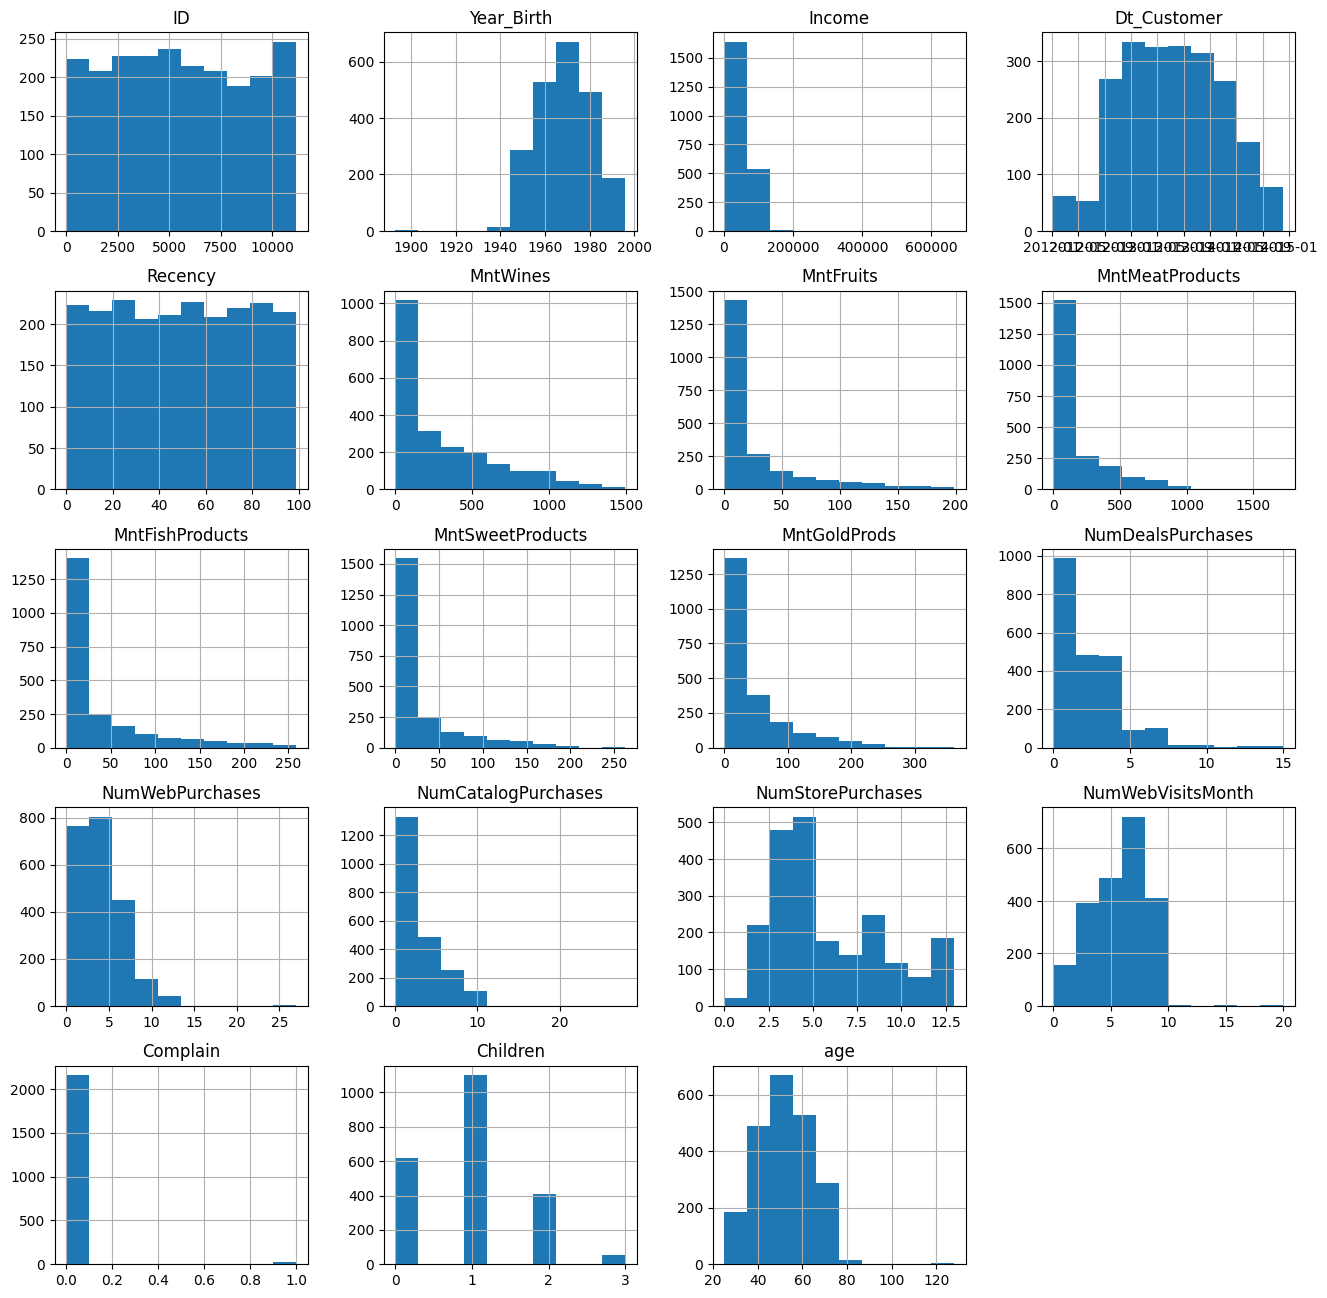

In [ ]:
df.hist(figsize= (16, 16))
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Kidhome", data=df)

ValueError: Could not interpret input 'Kidhome'

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='count'>

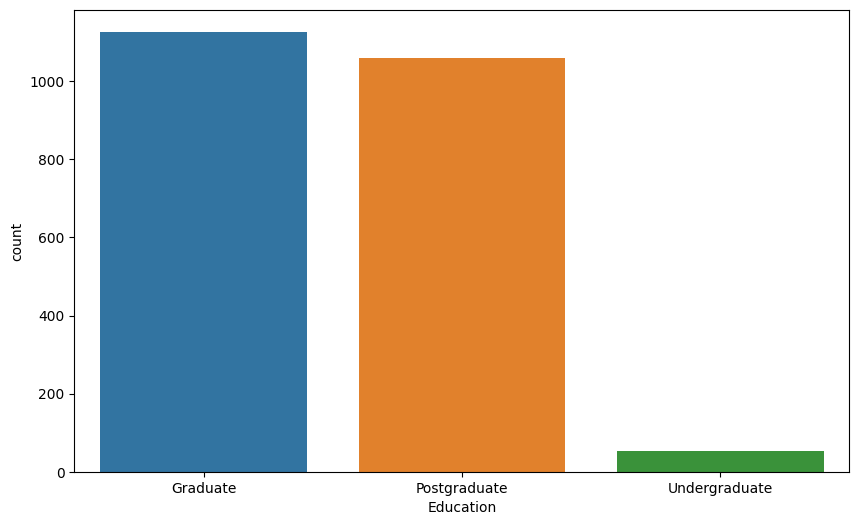

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Education", data=df)